In [20]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.timeseries import LombScargle
import scipy.signal as signal
from scipy import optimize
from lmfit import Model
import matplotlib.gridspec as gridspec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
tessfits = glob.glob('tessfits/*fits')

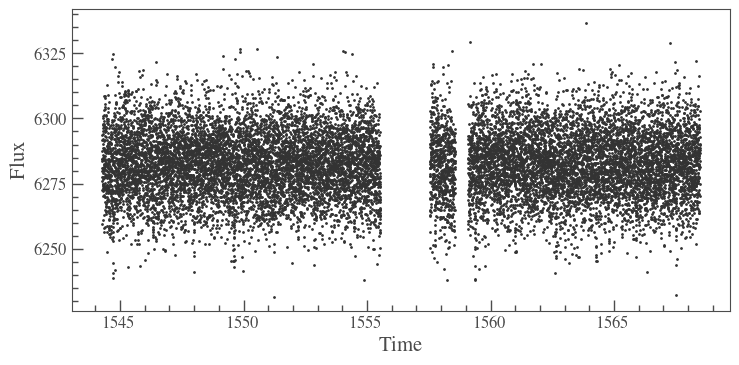

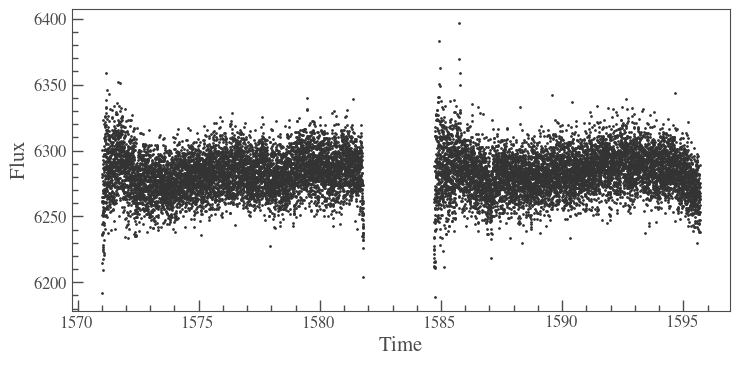

In [25]:
#p_planet = 1.628930d
for ft in tessfits:
    data = fits.getdata(ft)
    t, f, e, q, bk = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY'], data['SAP_BKG']#[np.isnan(data['SAP_BKG'])==False]
    t, f, e, bk = t[q==0], f[q==0], e[q==0], bk[q==0]
  #  fit = np.polyval((np.polyfit(t,f,2)), t)
   # f = (f/fit)-1
   # e = (e/fit)
    #cut_mask = (bk < 1.1*np.median(bk))
    lc = lk.LightCurve(time=t, flux=f, flux_err=e )
    lc = lc.remove_nans()
    lc.scatter()
    #pg  = lc.to_periodogram(method='bls')
    #pg.plot()
    #lcf = lc.fold(1.628930).bin(5)
    #lcf.scatter()
   # plt.axvline(1.628930)

In [15]:
for i, ft in enumerate(tessfits):
    data = fits.getdata(ft)
    t, f, e, q, bk = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY'], data['SAP_BKG']#[np.isnan(data['SAP_BKG'])==False]
    t, f, e, bk = t[q==0], f[q==0], e[q==0], bk[q==0]
    lc = lk.LightCurve(time=t, flux=f, flux_err=e )
    lc = lc.remove_nans()
    if i == 0:
        lc1 = lc
    else:
        lc2 = lc
    #lc.scatter()
    #pg  = lc.to_periodogram(method='bls')
    #pg.plot()
    #lcf = lc.fold(1.628930).bin(5)
    #lcf.scatter()
   # plt.axvline(1.628930)

In [17]:
lc = lc1.append(lc2)

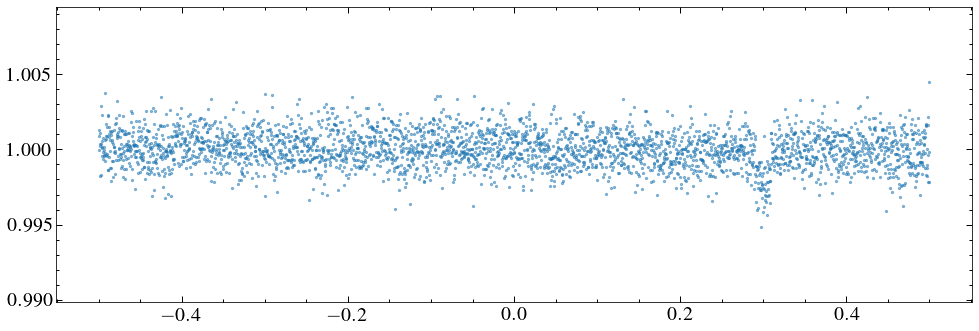

In [26]:
lcf = lc.fold(1.628930).bin(5)
plt.scatter(lcf.time, lcf.flux/np.median(lcf.flux), s=5, rasterized=True, alpha=0.5) 
plt.tight_layout()
#plt.savefig('gj1132_tess_quicklook.png')